In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LouZhou1/ricedatathon2023/main/datathon_2024_dataset%20(1).csv")
data['game_date'] = data['game_date'].astype(str)
data['year'] = data['game_date'].str[:4].astype(int)
data['month'] = data['game_date'].str[4:6].astype(int)
data['day'] = data['game_date'].str[6:8].astype(int)

In [ ]:
def expected_score(eloa, elob, pitcha, pitchb, const):
    #from eloa pov
    expecta = 1/(1 + 10**((elob - eloa))/((400)))
    #(pitchb - pitcha)*(const+1)
    return expecta


In [ ]:
def pitchscore(strikeouts, outs, walks, hits, runs, homeruns):
    gamescore = 47.4 * strikeouts + (1.5 * outs) - (2 * walks) - (2 * hits) - (3 * runs) - (4 * homeruns)
    return gamescore

In [ ]:
import math
def elo_change(eloa, elob, scalar, mov, win, expected_score):
    #from eloa pov, so win = 1 when eloa wins
    if win == 1:
        winelodiff = eloa - elob
    else:
        winelodiff = elob - eloa
    mov_factor = (math.log(mov, 10) + 1) * (2.2) * (0.29487)/((winelodiff) * .001 + 2.2)
    change = scalar * mov_factor * (win - expected_score)
    return change

In [ ]:
data["home_numhits"] = data["home_1b"] + data["home_2b"] + data["home_3b"]
data["away_numhits"] = data["away_1b"] + data["away_2b"] + data["away_3b"]

In [ ]:
season1 = data[data["year"] == 2000]
season1

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_hr,away_fo,away_so,away_bb,away_hbp,year,month,day,home_numhits,away_numhits
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,1,24,4,3,0,2000,3,29,10,6
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,0,24,9,6,0,2000,3,30,5,5
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,2,17,6,1,1,2000,4,3,6,5
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,1,10,4,1,0,2000,4,3,7,4
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,0,17,7,1,1,2000,4,3,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2424,20001001,CHA,KCA,True,2,6,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,...,1,18,4,7,0,2000,10,1,9,7
2425,2425,20001001,CLE,TOR,True,11,4,CLE08,Progressive Field,Cleveland,...,4,17,7,1,1,2000,10,1,6,8
2426,2426,20001001,DET,MIN,True,12,11,DET05,Comerica Park,Detroit,...,1,17,5,5,0,2000,10,1,15,18
2427,2427,20001001,OAK,TEX,True,3,0,OAK01,Oakland-Alameda County Coliseum,Oakland,...,2,17,5,4,0,2000,10,1,6,6


In [ ]:
data["home_pitcherscore"] = 0
data["away_pitcherscore"] = 0

In [ ]:
season1["home_pitcherscore"] = 0
season1["away_pitcherscore"] = 0
for team in season1["home_team"].unique():
    iteration = 1
    teamgames = season1[(season1["home_team"] == team) | (season1["away_team"] == team)]
    trueindex = list(teamgames.index.values)
    teamgames = teamgames.reset_index()
    for game in range(0, teamgames.shape[0]):
        print(game)
        if game == 0:
            pitcherscore = 0
        else:
            if team == teamgames.loc[game - 1, "home_team"]:
                previousgame = "home"
                against = "away"
            else:
                previousgame = "away"
                against = "home"
            strikeouts = teamgames.loc[game - 1, previousgame + "_so"]
            outs = teamgames.loc[game - 1, previousgame + "_fo"]
            walks = teamgames.loc[game - 1, previousgame + "_bb"]
            hits = teamgames.loc[game - 1, previousgame + "_numhits"]
            runs = teamgames.loc[game - 1, previousgame + "_score"]
            homeruns = teamgames.loc[game - 1, previousgame + "_hr"]
            pitcherscore = pitchscore(strikeouts, outs, walks, hits, runs, homeruns)
            #print(pitcherscore)
        if team == teamgames.loc[game, "home_team"]:
          season1.loc[trueindex[game], "home_pitcherscore"] = pitcherscore
        else:
          season1.loc[trueindex[game], "away_pitcherscore"] = pitcherscore
print(season1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142


In [ ]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
import time
data["home_pitcherscore"] = 0
data["away_pitcherscore"] = 0
allyears = pd.DataFrame()
for year in data["year"].unique():
    seasondf = data[data["year"] == year]
    for team in seasondf["home_team"].unique():
      iteration = 1
      teamgames = seasondf[(seasondf["home_team"] == team) | (seasondf["away_team"] == team)]
      trueindex = list(teamgames.index.values)
      teamgames = teamgames.reset_index()
      numgames = teamgames.shape[0]
      for game in range(0, numgames):
          if game == 0:
              pitcherscore = 0
          else:
              if team == teamgames.loc[game - 1, "home_team"]:
                  previousgame = "home"
                  against = "away"
              else:
                  previousgame = "away"
                  against = "home"
              strikeouts = teamgames.loc[game - 1, previousgame + "_so"]
              outs = teamgames.loc[game - 1, previousgame + "_fo"]
              walks = teamgames.loc[game - 1, previousgame + "_bb"]
              hits = teamgames.loc[game - 1, previousgame + "_numhits"]
              runs = teamgames.loc[game - 1, previousgame + "_score"]
              homeruns = teamgames.loc[game - 1, previousgame + "_hr"]
              pitcherscore = pitchscore(strikeouts, outs, walks, hits, runs, homeruns)
          if team == teamgames.loc[game, "home_team"]:
            seasondf.loc[trueindex[game], "home_pitcherscore"] = pitcherscore
          else:
            seasondf.loc[trueindex[game], "away_pitcherscore"] = pitcherscore
    allyears = pd.concat([allyears, seasondf])
print(allyears)


       Unnamed: 0 game_date home_team away_team  is_day_game  home_score  \
0               0  20000329       NYN       CHN        False           3   
1               1  20000330       CHN       NYN        False           1   
2               2  20000403       ATL       COL         True           2   
3               3  20000403       CIN       MIL         True           3   
4               4  20000403       FLO       SFN        False           6   
...           ...       ...       ...       ...          ...         ...   
56770       56770  20231001       CHA       SDN         True           1   
56771       56771  20231001       DET       CLE         True           5   
56772       56772  20231001       KCA       NYA         True           5   
56773       56773  20231001       SEA       TEX         True           1   
56774       56774  20231001       TOR       TBA         True           8   

       away_score  venue                                 venue_name  \
0               

In [ ]:
for i in (range(0, 162, 1)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161


In [ ]:
allyears["away_pitcherscore"]

0          0.0
1        205.5
2          0.0
3          0.0
4          0.0
         ...  
56770    419.6
56771    145.2
56772    404.1
56773    279.9
56774    273.4
Name: away_pitcherscore, Length: 56775, dtype: float64

In [ ]:
from collections import defaultdict
def def_value():
    return 1500

# Defining the dict
elos = defaultdict(lambda:1500)
season2000 = data[data["year"] == 2000]
season2000

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_bb,away_hbp,year,month,day,home_numhits,away_numhits,home_pitcherscore,away_pitcherscore,Margin_Victory
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,3,0,2000,3,29,10,6,0,0,-2
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,6,0,2000,3,30,5,5,0,0,-4
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,1,1,2000,4,3,6,5,0,0,2
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,1,0,2000,4,3,7,4,0,0,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,1,1,2000,4,3,9,12,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2424,20001001,CHA,KCA,True,2,6,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,...,7,0,2000,10,1,9,7,0,0,-4
2425,2425,20001001,CLE,TOR,True,11,4,CLE08,Progressive Field,Cleveland,...,1,1,2000,10,1,6,8,0,0,7
2426,2426,20001001,DET,MIN,True,12,11,DET05,Comerica Park,Detroit,...,5,0,2000,10,1,15,18,0,0,1
2427,2427,20001001,OAK,TEX,True,3,0,OAK01,Oakland-Alameda County Coliseum,Oakland,...,4,0,2000,10,1,6,6,0,0,3


In [ ]:
data["Margin_Victory"] = data["home_score"] - data["away_score"]
zeros = data[data["Margin_Victory"] == 0]
print(zeros)

       Unnamed: 0 game_date home_team away_team  is_day_game  home_score  \
3               3  20000403       CIN       MIL         True           3   
4754         4754  20010930       NYA       BAL         True           1   
6650         6650  20020815       ATL       SFN        False           3   
9559         9559  20030918       BAL       NYA        False           1   
13301       13301  20050630       CIN       HOU        False           2   
41248       41248  20160929       PIT       CHN        False           1   

       away_score  venue                   venue_name        city  ...  \
3               3  CIN08                Cinergy Field  Cincinnati  ...   
4754            1  NYC16             Yankee Stadium I    New York  ...   
6650            3  ATL02                 Turner Field     Atlanta  ...   
9559            1  BAL12  Oriole Park at Camden Yards   Baltimore  ...   
13301           2  CIN09      Great American Ballpark  Cincinnati  ...   
41248           1  PIT0

In [ ]:
noties = data[(data["Margin_Victory"] != 0)].reset_index()

In [ ]:
import math
def elo_change(eloa, elob, scalar, mov, win, expected_score):
    #from eloa pov, so win = 1 when eloa wins
    if win == 1:
        winelodiff = eloa - elob
    else:
        winelodiff = elob - eloa
    if mov == 0:
      mov = .00001
    mov_factor = (math.log(mov, 10) + 1) * (2.2) * (0.29487)/((winelodiff) * .001 + 2.2)
    change = scalar * mov_factor * (win - expected_score)
    return eloa + change

In [ ]:
def expected_score(eloa, elob, pitcha, pitchb, const):
    #from eloa pov
    expecta = 1/(1 + 10 ** ((pitchb - pitcha) + const * (elob - eloa)/((400) * (const + 1))))
    #expecta = 1/(1 + 10**((elob - eloa)/((400) + (const))))
    #(pitchb - pitcha)*(const+1)
    return expecta


In [ ]:
from collections import defaultdict
def def_value():
    return 1500

# Defining the dict
elos = defaultdict(lambda:1500)
season2000 = data[data["year"] == 2000]
season2000

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_bb,away_hbp,year,month,day,home_numhits,away_numhits,home_pitcherscore,away_pitcherscore,Margin_Victory
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,3,0,2000,3,29,10,6,0,0,-2
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,6,0,2000,3,30,5,5,0,0,-4
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,1,1,2000,4,3,6,5,0,0,2
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,1,0,2000,4,3,7,4,0,0,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,1,1,2000,4,3,9,12,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2424,20001001,CHA,KCA,True,2,6,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,...,7,0,2000,10,1,9,7,0,0,-4
2425,2425,20001001,CLE,TOR,True,11,4,CLE08,Progressive Field,Cleveland,...,1,1,2000,10,1,6,8,0,0,7
2426,2426,20001001,DET,MIN,True,12,11,DET05,Comerica Park,Detroit,...,5,0,2000,10,1,15,18,0,0,1
2427,2427,20001001,OAK,TEX,True,3,0,OAK01,Oakland-Alameda County Coliseum,Oakland,...,4,0,2000,10,1,6,6,0,0,3


In [ ]:
def expected_score_winner(data):
    #from eloa pov
    expecta = 1/(1 + 10 ** ((data["away_final_elo"] - data["home_final_elo"])/((400))))
    #expecta = 1/(1 + 10**((elob - eloa)/((400) + (const))))
    #(pitchb - pitcha)*(const+1)
    return expecta

In [ ]:
def getwinner(data):
  if data["Margin_Victory"] > 0:
    return 1
  else:
    return 0

In [ ]:
def getchoice(data):
  if data["home_win_odds"] > 0.5:
    return 1
  else:
    return 0

In [ ]:
#expected_score(eloa, elob, pitcha, pitchb, const), def elo_change(eloa, elob, scalar, mov, win, expected_score):
elos = defaultdict(lambda:1500)
noties["home_pregame_elo"] = 0
noties["away_pregame_elo"] = 0
const = 37.7121
scalar = 32
allelos = pd.DataFrame()
for season in noties["year"].unique():
  seasondf = noties[noties["year"] == season].reset_index()
  for game in range(seasondf.shape[0]):
    hometeam = seasondf.loc[game, "home_team"]
    awayteam = seasondf.loc[game, "away_team"]
    seasondf.loc[game, "home_pregame_elo"] = elos[hometeam]
    seasondf.loc[game, "away_pregame_elo"] = elos[awayteam]
    pitchhome = seasondf.loc[game, "home_pitcherscore"]
    pitchaway = seasondf.loc[game, "away_pitcherscore"]
    homeexpected = expected_score(elos[hometeam], elos[awayteam], pitchhome, pitchaway, const)
    awayexpected = expected_score(elos[awayteam], elos[hometeam], pitchaway, pitchhome, const)
    marginofvictory = seasondf.loc[game, "Margin_Victory"]
    if marginofvictory > 0:
      homewin = 1
      awaywin = 0
    elif marginofvictory == 0:
      homewin = 0.5
      awaywin = 0.5
    else:
      homewin = 0
      awaywin = 1
    #print(marginofvictory)
    #print(math.log(abs(marginofvictory)))
    homeelochange = elo_change(elos[hometeam], elos[awayteam], scalar, abs(marginofvictory), homewin, homeexpected)
    awayelochange = elo_change(elos[awayteam], elos[hometeam], scalar, abs(marginofvictory), awaywin, awayexpected)
    elos[hometeam] = homeelochange
    elos[awayteam] = awayelochange
  #new season, regress elos to mean
  seasondf["home_final_elo"] = seasondf["home_team"].map(elos)
  seasondf["away_final_elo"] = seasondf["away_team"].map(elos)
  seasondf["home_win_odds"] =  1/(1 + 10 ** ((seasondf["home_pitcherscore"] - seasondf["away_pitcherscore"]) + const * (seasondf["away_final_elo"] - seasondf["home_final_elo"])/((400) * (const + 1))))
  for key in elos:
    if elos[key] > 1500:
      elos[key] = elos[key] - (abs(elos[key] - 1500))/3
    elif elos[key] < 1500:
      elos[key] = elos[key] + (abs(elos[key] - 1500))/3
  allelos = pd.concat([allelos, seasondf])
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score
allelos["HomeWin"] = allelos.apply(getwinner, axis = 1)
allelos["HomeWinPred"] = allelos.apply(getchoice, axis = 1)
print(roc_auc_score(allelos["HomeWin"], allelos["home_win_odds"]))
print(accuracy_score(allelos["HomeWin"], allelos["HomeWinPred"]))

0.6064373028748078
0.5769698250805898


In [452]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score
def test_elo(const, scalar):
  elos = defaultdict(lambda:1500)
  noties["home_pregame_elo"] = 0
  noties["away_pregame_elo"] = 0
  allelos = pd.DataFrame()
  for season in noties["year"].unique():
    seasondf = noties[noties["year"] == season].reset_index()
    for game in range(seasondf.shape[0]):
      hometeam = seasondf.loc[game, "home_team"]
      awayteam = seasondf.loc[game, "away_team"]
      seasondf.loc[game, "home_pregame_elo"] = elos[hometeam]
      seasondf.loc[game, "away_pregame_elo"] = elos[awayteam]
      pitchhome = seasondf.loc[game, "home_pitcherscore"]
      pitchaway = seasondf.loc[game, "away_pitcherscore"]
      homeexpected = expected_score(elos[hometeam], elos[awayteam], pitchhome, pitchaway, const)
      awayexpected = expected_score(elos[awayteam], elos[hometeam], pitchaway, pitchhome, const)
      marginofvictory = seasondf.loc[game, "Margin_Victory"]
      if marginofvictory > 0:
        homewin = 1
        awaywin = 0
      elif marginofvictory == 0:
        homewin = 0.5
        awaywin = 0.5
      else:
        homewin = 0
        awaywin = 1
      #print(marginofvictory)
      #print(math.log(abs(marginofvictory)))
      homeelochange = elo_change(elos[hometeam], elos[awayteam], scalar, abs(marginofvictory), homewin, homeexpected)
      awayelochange = elo_change(elos[awayteam], elos[hometeam], scalar, abs(marginofvictory), awaywin, awayexpected)
      elos[hometeam] = homeelochange
      elos[awayteam] = awayelochange
    #new season, regress elos to mean
    seasondf["home_final_elo"] = seasondf["home_team"].map(elos)
    seasondf["away_final_elo"] = seasondf["away_team"].map(elos)
    seasondf["home_win_odds"] =  1/(1 + 10 ** ((seasondf["home_pitcherscore"] - seasondf["away_pitcherscore"]) + const * (seasondf["away_final_elo"] - seasondf["home_final_elo"])/((400) * (const + 1))))
    for key in elos:
      if elos[key] > 1500:
        elos[key] = elos[key] - (abs(elos[key] - 1500))/3
      elif elos[key] < 1500:
        elos[key] = elos[key] + (abs(elos[key] - 1500))/3
    allelos = pd.concat([allelos, seasondf])

  allelos["HomeWin"] = allelos.apply(getwinner, axis = 1)
  allelos["HomeWinPred"] = allelos.apply(getchoice, axis = 1)
  #return roc_auc_score(allelos["HomeWin"], allelos["home_win_odds"])
  return allelos

In [372]:
import timeit

start = timeit.default_timer()
test_elo(1,100)
stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  24.554407429001003


In [428]:
print(test_elo(scalar = 16, const = 15))

0.6127474900647917


1 5 0.6065076266789154
1 8 0.6096901305648958
1 11 0.6115454647532159
1 14 0.6125772267829261
1 17 0.6130801876137071
1 20 0.6132085754666217
5 5 0.6093065450439016
5 8 0.6119775612020842
5 11 0.6130419326827573
5 14 0.6132090074294867
5 17 0.6128634646033524
5 20 0.6122099547265465
9 5 0.609726092097629
9 8 0.6122578139647802
9 11 0.6131455862920854
9 14 0.6131469283732411
9 17 0.6126467740526349
9 20 0.6118507164303867
13 5 0.6098891231226251
13 8 0.612368019427043
13 11 0.613172074604531
13 14 0.613106125360767
13 17 0.6125455137173303
13 20 0.6116752633519036
17 5 0.609976347161713
17 8 0.6124225928163975
17 11 0.6131856090248179
17 14 0.6130794847377157
17 17 0.6124849977174633
17 20 0.6115854974735291
21 5 0.6100351115896161
21 8 0.6124577491004373
21 11 0.6131960035994242
21 14 0.613061157527144
21 17 0.6124477752526676
21 20 0.6115236643614581


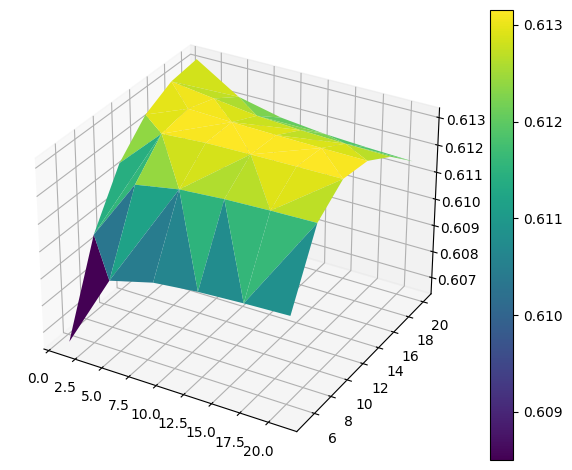

In [434]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#scalar = 9 const = 14 , score = 0.6131469283732411
#print(test_elo(scalar = 16, const = 20)), 0.6126959454092822
#x is scalar,  y is const
Xcoord = []
Ycoord = []
Zcoord = []
for x in range(1, 25, 4):
  for y in range(5, 21, 3):
    z = test_elo(x, y)
    print(x,y,z)
    Xcoord.append(x)
    Ycoord.append(y)
    Zcoord.append(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plot = ax.plot_trisurf(Xcoord, Ycoord, Zcoord, cmap = 'viridis')
fig.colorbar(plot)
fig.tight_layout()


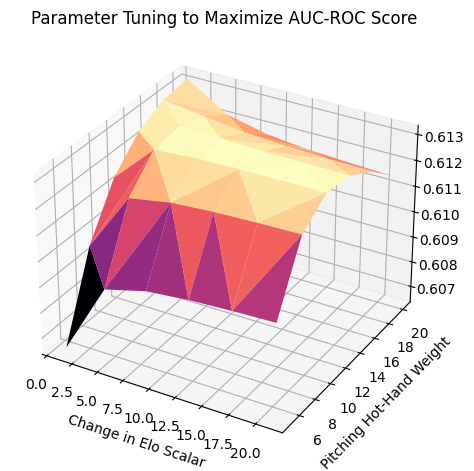

In [450]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plot = ax.plot_trisurf(Xcoord, Ycoord, Zcoord, cmap = 'magma')
#ax.set_zticks([])
#ax.set_yticks([])
#ax.set_xticks([])

plt.xlabel("Change in Elo Scalar")
plt.ylabel("Pitching Hot-Hand Weight")
plt.title("Parameter Tuning to Maximize AUC-ROC Score")

fig.tight_layout()

In [453]:
finalelodf = test_elo(9, 14)
finalelodf

,level_0,index,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,...,home_pitcherscore,away_pitcherscore,Margin_Victory,home_pregame_elo,away_pregame_elo,HomeWin,home_final_elo,away_final_elo,home_win_odds,HomeWinPred
0,0,0,0,20000329,NYN,CHN,False,3,5,TOK01,...,0,0,-2,1500.000000,1500.000000,0,1539.047683,1435.514505,0.630971,1
1,1,1,1,20000330,CHN,NYN,False,1,5,TOK01,...,0,0,-4,1502.685443,1497.314557,0,1435.514505,1539.047683,0.369029,0
2,2,2,2,20000403,ATL,COL,True,2,0,ATL02,...,0,0,2,1500.000000,1500.000000,1,1535.982363,1502.242683,0.543589,1
3,3,4,4,20000403,FLO,SFN,False,6,4,MIA01,...,0,0,2,1500.000000,1500.000000,1,1480.784218,1566.733890,0.390481,0
4,4,5,5,20000403,MON,LAN,False,4,10,MON02,...,0,0,-6,1500.000000,1500.000000,0,1432.516520,1517.531178,0.391635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,56764,56770,56770,20231001,CHA,SDN,True,1,2,CHI12,...,0,0,-1,1417.785344,1530.786681,0,1416.380906,1532.191119,0.354346,0
2426,56765,56771,56771,20231001,DET,CLE,True,5,2,DET05,...,0,0,3,1479.190990,1485.405568,1,1482.297756,1482.298803,0.499999,0
2427,56766,56772,56772,20231001,KCA,NYA,True,5,2,KAN06,...,0,0,3,1417.489317,1510.537237,1,1421.425693,1506.600861,0.391437,0
2428,56767,56773,56773,20231001,SEA,TEX,True,1,0,SEA03,...,0,0,1,1534.876234,1521.703467,1,1536.858052,1519.721648,0.522181,1


In [457]:
finalelodf_cleaned = finalelodf.drop(columns = ["level_0", "index", "Unnamed: 0", "HomeWinPred", "HomeWin","home_win_odds"])
finalelodf_cleaned

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,day,home_numhits,away_numhits,home_pitcherscore,away_pitcherscore,Margin_Victory,home_pregame_elo,away_pregame_elo,home_final_elo,away_final_elo
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,...,29,10,6,0,0,-2,1500.000000,1500.000000,1539.047683,1435.514505
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,...,30,5,5,0,0,-4,1502.685443,1497.314557,1435.514505,1539.047683
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,3,6,5,0,0,2,1500.000000,1500.000000,1535.982363,1502.242683
3,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,3,9,12,0,0,2,1500.000000,1500.000000,1480.784218,1566.733890
4,20000403,MON,LAN,False,4,10,MON02,Stade Olympique,Montreal,QUE,...,3,7,7,0,0,-6,1500.000000,1500.000000,1432.516520,1517.531178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,20231001,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,...,1,7,7,0,0,-1,1417.785344,1530.786681,1416.380906,1532.191119
2426,20231001,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,...,1,4,8,0,0,3,1479.190990,1485.405568,1482.297756,1482.298803
2427,20231001,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,...,1,7,8,0,0,3,1417.489317,1510.537237,1421.425693,1506.600861
2428,20231001,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,...,1,4,4,0,0,1,1534.876234,1521.703467,1536.858052,1519.721648


In [458]:
finalelodf_cleaned

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,day,home_numhits,away_numhits,home_pitcherscore,away_pitcherscore,Margin_Victory,home_pregame_elo,away_pregame_elo,home_final_elo,away_final_elo
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,...,29,10,6,0,0,-2,1500.000000,1500.000000,1539.047683,1435.514505
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,...,30,5,5,0,0,-4,1502.685443,1497.314557,1435.514505,1539.047683
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,3,6,5,0,0,2,1500.000000,1500.000000,1535.982363,1502.242683
3,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,3,9,12,0,0,2,1500.000000,1500.000000,1480.784218,1566.733890
4,20000403,MON,LAN,False,4,10,MON02,Stade Olympique,Montreal,QUE,...,3,7,7,0,0,-6,1500.000000,1500.000000,1432.516520,1517.531178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,20231001,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,...,1,7,7,0,0,-1,1417.785344,1530.786681,1416.380906,1532.191119
2426,20231001,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,...,1,4,8,0,0,3,1479.190990,1485.405568,1482.297756,1482.298803
2427,20231001,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,...,1,7,8,0,0,3,1417.489317,1510.537237,1421.425693,1506.600861
2428,20231001,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,...,1,4,4,0,0,1,1534.876234,1521.703467,1536.858052,1519.721648


In [459]:
finalelodf.to_csv("baseballwelo.csv", index = False)